In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
disaster_tweets = train.loc[train['target'] == 1]
non_disaster_tweets = train.loc[train['target'] == 0]

In [4]:

from wordcloud import STOPWORDS
from collections import defaultdict

In [5]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS] #elimina las stopwords
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]



# Unigramas
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in disaster_tweets['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in non_disaster_tweets['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        


# Bigramas
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in disaster_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in non_disaster_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        


# Trigramas
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in disaster_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in non_disaster_tweets['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

In [6]:
from wordcloud import WordCloud

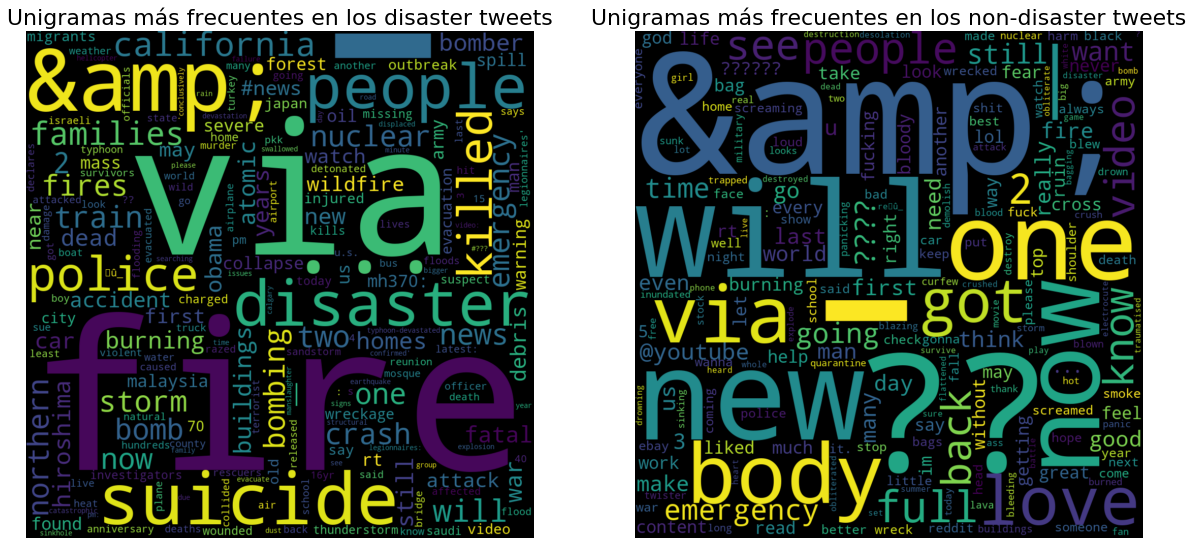

In [7]:
#Comparacion unigramas

dis_unigram_wc = WordCloud(width=1000, height=1000).generate_from_frequencies(disaster_unigrams)
non_dis_unigram_wc = WordCloud(width=1000, height=1000).generate_from_frequencies(nondisaster_unigrams)


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(dis_unigram_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Unigramas más frecuentes en los disaster tweets', size = 22)
plt.subplot(122)
plt.imshow(non_dis_unigram_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Unigramas más frecuentes en los non-disaster tweets', size = 22)
plt.show()

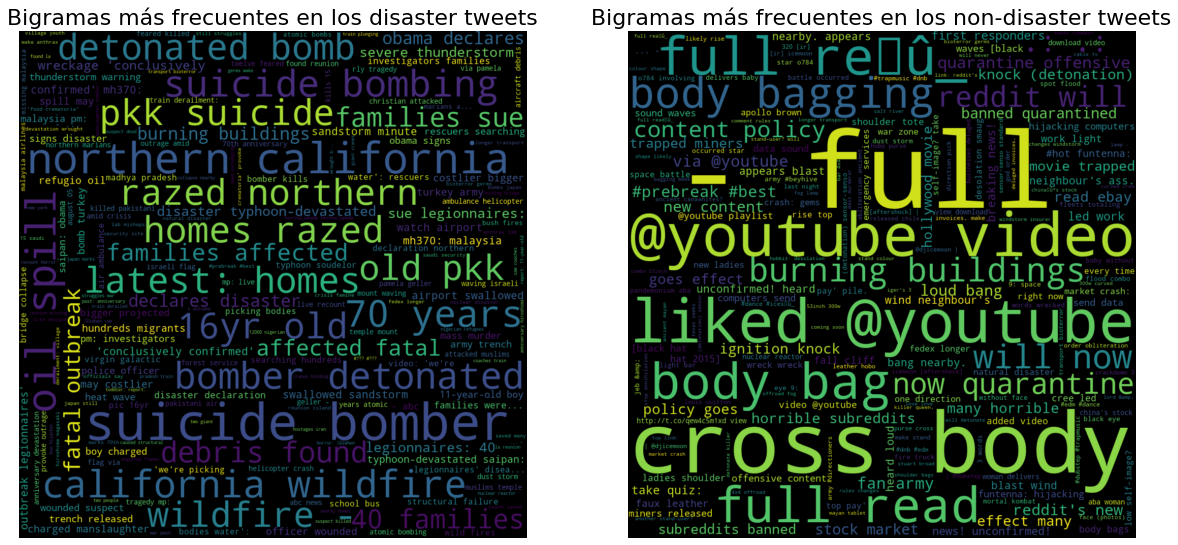

In [8]:
#Comparacion bigramas

dis_bigram_wc = WordCloud(width=1000, height=1000).generate_from_frequencies(disaster_bigrams)
non_dis_bigram_wc = WordCloud(width=1000, height=1000).generate_from_frequencies(nondisaster_bigrams)


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(dis_bigram_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Bigramas más frecuentes en los disaster tweets', size = 22)
plt.subplot(122)
plt.imshow(non_dis_bigram_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Bigramas más frecuentes en los non-disaster tweets', size = 22)
plt.show()

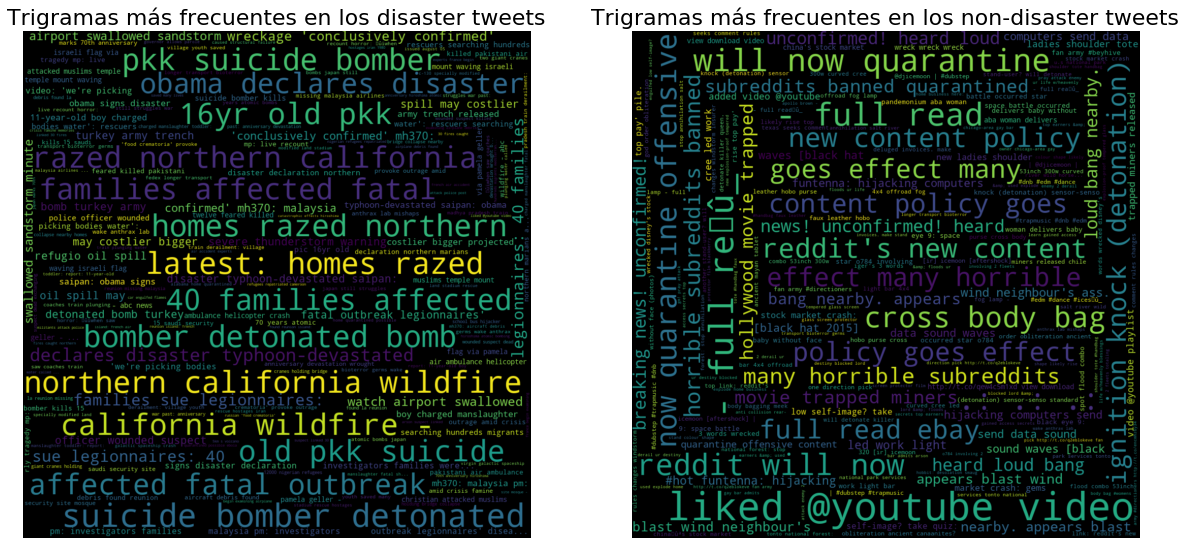

In [9]:
#Comparacion trigramas

dis_trigram_wc = WordCloud(width=1000, height=1000).generate_from_frequencies(disaster_trigrams)
non_dis_trigram_wc = WordCloud(width=1000, height=1000).generate_from_frequencies(nondisaster_trigrams)


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(dis_trigram_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Trigramas más frecuentes en los disaster tweets', size = 22)
plt.subplot(122)
plt.imshow(non_dis_trigram_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Trigramas más frecuentes en los non-disaster tweets', size = 22)
plt.show()

